# CZ2001 Project II: Graph Algorithms

DSAI1 Group 4

## Table of Contents

> 1. The Algorithm 
> 2. Random Graph Generator 
> 3. Small-scale Graph
> 4. Medium-scale Graph
> 5. Real Road Network in Pennsylvania (Large-scale Graph)
> 6. Output the result to text file
> 7. Empirical Analysis

In [1]:
#Import all the neccessary libraries

import os
import sys
import pandas as pd
import networkx as nx
import random
import numpy as np
import progressbar

from collections import defaultdict
from queue import Queue 
from matplotlib import pyplot as plt
from datetime import datetime

---
## The Algorithm

In this project, we created two algorithms, namely:

> 1. .solve() algorithm to solve for problem (a) & (b), and
> 2. .topK() algorithm to solve for problem (c) & (d) respectively.


In [2]:
class NearestHospitalFinder():
    
    def __init__(self, adj_list, hospitals=[]):         # take nested list of edges and list of hospitals
        self.adj_list=adj_list
        self.hospitals=hospitals
        self.solutionPath=defaultdict(dict)      # solutionPath stores the shortest path to the nearest hospital for every node
        self.solutionDistance=defaultdict(dict)  # solutionDistance stores the shortest distance to a hospital for every node
        self.topKDistances=defaultdict(dict)     # topKDistances stores top K distances for every node
        
    """
    Algorithm to tackle problem (a) & (b)
    
    Find the shortest path to the nearest hospital for every node
    
    """
            
    def solve(self):                            
        
        Q=Queue()  
        for H in self.hospitals:                 # shortest path of a hospital is simply to itself
            self.solutionPath[H][H]=[H] 
            self.solutionDistance[H][H]=len(self.solutionPath[H][H])-1
            Q.put(H)                                                                                           
                                                  # apply BFS to each hospital simultaneously!
        while not Q.empty():                                       
            currentNode=Q.get()
            H=list(self.solutionPath[currentNode].keys())[-1]     # H is the nearest hospital of the current Node   
            for neighbourNode in self.adj_list[currentNode]:      # for the neighbour nodes, update their shortest path using the path of the current node
                if self.solutionPath[neighbourNode]=={}:        # e.g. ['567']+['678','345','0'], so ['567','678','345','0'] is the path
                    self.solutionPath[neighbourNode][H]=[neighbourNode]+self.solutionPath[currentNode][H]
                    self.solutionDistance[neighbourNode][H]=len(self.solutionPath[neighbourNode][H])-1
                    Q.put(neighbourNode) 
       
   
    """
    Algorithm to tackle problem (c) & (d)
    
    Find the nearest K hospitals distances for every node
    
    """
                    
    def topK(self,K):                             
                         
        for H in self.hospitals:                   # apply BFS each hospital consecutively  
            
            if len(self.topKDistances[H])>=K:        # this ensures that hospitals will have only top k distances including itself eg {'0':0,'677':13,'899':15}
                del self.topKDistances[H][max(self.topKDistances[H],key=lambda x: self.topKDistances[H][x])]
            self.topKDistances[H][H]=0              # distance of hospital to itself is 0
            
            self.explored=defaultdict(lambda: False)           
            self.explored[H]=True                              # consider hospital as explored already            
            
            Q=Queue()                                          # put hospital in Q and begin BFS
            Q.put(H)                                                                                                   

            while not Q.empty():                                       
                currentNode=Q.get()

                for neighbourNode in self.adj_list[currentNode]:     
                    if self.explored[neighbourNode]==False:                    # if the node is not yet explored
                        
                        distance=self.topKDistances[currentNode][H]+1          # its shortest distance to H is 1+currentNode's distance!
                        
                        if len(self.topKDistances[neighbourNode])>=K:          # if there is already K solutions 
                            furthestHospital=max(self.topKDistances[neighbourNode],key=lambda x: self.topKDistances[neighbourNode][x])
                            if distance<self.topKDistances[neighbourNode][furthestHospital]:   # delete the longest existing distance if its longer than the new distance
                                del self.topKDistances[neighbourNode][furthestHospital]
                            else:                                               # if there is already k distances and existing distances are shorter, no need to continue down this path
                                self.explored[neighbourNode]=True
                                continue
                                
                        self.topKDistances[neighbourNode][H]=distance  # all else, update topKDistances
                        self.explored[neighbourNode]=True
                        Q.put(neighbourNode) 

---
## Random Graph Generator
We will utilize the networkX python library to generate and visualize the random graph

In [3]:
class GraphGenerator:

    def __init__(self,max_nodes,max_edges):
        self.max_nodes = max_nodes
        self.max_edges = max_edges

    def generate_unweighted_graph(self, seed=random.randint(0,1000), connectivity=True): # generate random graph using Networkx library
        
        n_nodes = self.max_nodes
        m_edges = self.max_edges
        p = 2 * m_edges / (n_nodes * (n_nodes - 1))
            
        G = nx.generators.fast_gnp_random_graph(n_nodes, p, seed=seed)
        if (connectivity):
            while(not nx.is_connected(G)):
                G = nx.generators.fast_gnp_random_graph(n_nodes, p, seed=random.randint(0,1000))
        self.G = G
        return G

    def draw_graph(self, G=None, figsize=(8,3)):  # visualize the graph with all the settings parameter
        if not G:
            try:
                G = self.G
            except:
                print('ERROR: Graph G does not exist. \
                       \nSpeify arg G or call generate_graph methods')
                return
            
        plt.figure(figsize=(figsize[0], figsize[1]))   
        pos = nx.spring_layout(G)
        nx.draw(G, pos)
        nx.draw_networkx_labels(G, pos, font_color='white', font_weight='bold')
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.draw()
        plt.show()
        
        return

---
## Small-scale random graph

We will create a small-scale graph consisting only 30 nodes and 45 edges

In [129]:
n_nodes = 30
m_edges = 45
generator = GraphGenerator(max_nodes=n_nodes,max_edges=m_edges)
G = generator.generate_unweighted_graph()
graphRandom = G

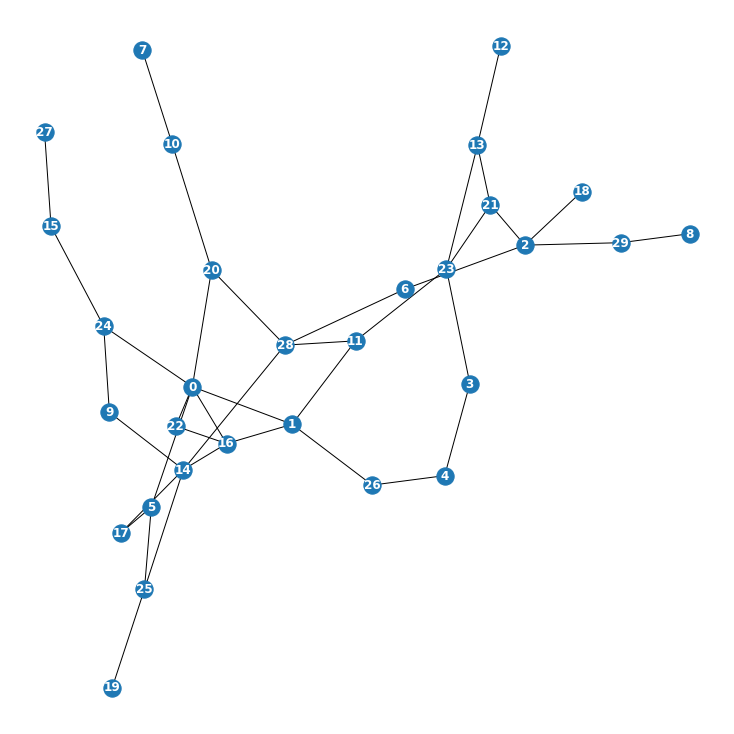

In [130]:
generator.draw_graph(figsize=(10,10))

In [131]:
G.edges()

EdgeView([(0, 1), (0, 5), (0, 16), (0, 20), (0, 22), (0, 24), (1, 11), (1, 16), (1, 26), (2, 6), (2, 18), (2, 21), (2, 29), (3, 4), (3, 23), (4, 26), (5, 17), (5, 25), (6, 28), (7, 10), (8, 29), (9, 14), (9, 24), (10, 20), (11, 23), (11, 28), (12, 13), (13, 21), (13, 23), (14, 16), (14, 17), (14, 25), (14, 28), (15, 24), (15, 27), (16, 22), (19, 25), (20, 28), (21, 23)])

In [132]:
H = G.to_directed()

In [133]:
list(H.edges())

[(0, 1),
 (0, 5),
 (0, 16),
 (0, 20),
 (0, 22),
 (0, 24),
 (1, 0),
 (1, 11),
 (1, 16),
 (1, 26),
 (2, 6),
 (2, 18),
 (2, 21),
 (2, 29),
 (3, 4),
 (3, 23),
 (4, 3),
 (4, 26),
 (5, 0),
 (5, 17),
 (5, 25),
 (6, 2),
 (6, 28),
 (7, 10),
 (8, 29),
 (9, 14),
 (9, 24),
 (10, 7),
 (10, 20),
 (11, 1),
 (11, 23),
 (11, 28),
 (12, 13),
 (13, 12),
 (13, 21),
 (13, 23),
 (14, 9),
 (14, 16),
 (14, 17),
 (14, 25),
 (14, 28),
 (15, 24),
 (15, 27),
 (16, 0),
 (16, 1),
 (16, 14),
 (16, 22),
 (17, 5),
 (17, 14),
 (18, 2),
 (19, 25),
 (20, 0),
 (20, 10),
 (20, 28),
 (21, 2),
 (21, 13),
 (21, 23),
 (22, 0),
 (22, 16),
 (23, 3),
 (23, 11),
 (23, 13),
 (23, 21),
 (24, 0),
 (24, 9),
 (24, 15),
 (25, 5),
 (25, 14),
 (25, 19),
 (26, 1),
 (26, 4),
 (27, 15),
 (28, 6),
 (28, 11),
 (28, 14),
 (28, 20),
 (29, 2),
 (29, 8)]

In [134]:
adj_list2 = defaultdict(list)
for edge in H.edges:
    adj_list2[edge[0]].append(edge[1])

In [135]:
adj_list2

defaultdict(list,
            {0: [1, 5, 16, 20, 22, 24],
             1: [0, 11, 16, 26],
             2: [6, 18, 21, 29],
             3: [4, 23],
             4: [3, 26],
             5: [0, 17, 25],
             6: [2, 28],
             7: [10],
             8: [29],
             9: [14, 24],
             10: [7, 20],
             11: [1, 23, 28],
             12: [13],
             13: [12, 21, 23],
             14: [9, 16, 17, 25, 28],
             15: [24, 27],
             16: [0, 1, 14, 22],
             17: [5, 14],
             18: [2],
             19: [25],
             20: [0, 10, 28],
             21: [2, 13, 23],
             22: [0, 16],
             23: [3, 11, 13, 21],
             24: [0, 9, 15],
             25: [5, 14, 19],
             26: [1, 4],
             27: [15],
             28: [6, 11, 14, 20],
             29: [2, 8]})

### Solution for problem (a) and (b)
- Design an algorithm for computing the distance from each node in G to its
nearest hospital. Output the distance and the shortest path for each node to a
file
- Design an algorithm to complete the task (a) but its time complexity should not
depend on the total number of hospitals h. You could skip (b) if your algorithm
in (a) already satisfies this complexity constraint.

In [136]:
# declare hospitals
randomHospitals2=list(map(int,random.sample(range(0,30),3)))

In [137]:
randomHospitals2

[18, 11, 24]

In [138]:
# input adjacency list and the hospitals
Finder=NearestHospitalFinder(adj_list2, randomHospitals2)

In [139]:
# .solve() method finds the shortest path 
Finder.solve()

In [140]:
Finder.solutionPath

defaultdict(dict,
            {18: {18: [18]},
             11: {11: [11]},
             24: {24: [24]},
             2: {18: [2, 18]},
             1: {11: [1, 11]},
             23: {11: [23, 11]},
             28: {11: [28, 11]},
             0: {24: [0, 24]},
             9: {24: [9, 24]},
             15: {24: [15, 24]},
             6: {18: [6, 2, 18]},
             21: {18: [21, 2, 18]},
             29: {18: [29, 2, 18]},
             16: {11: [16, 1, 11]},
             26: {11: [26, 1, 11]},
             3: {11: [3, 23, 11]},
             13: {11: [13, 23, 11]},
             14: {11: [14, 28, 11]},
             20: {11: [20, 28, 11]},
             5: {24: [5, 0, 24]},
             22: {24: [22, 0, 24]},
             27: {24: [27, 15, 24]},
             8: {18: [8, 29, 2, 18]},
             4: {11: [4, 26, 1, 11]},
             12: {11: [12, 13, 23, 11]},
             17: {11: [17, 14, 28, 11]},
             25: {11: [25, 14, 28, 11]},
             10: {11: [10, 20, 28, 11]},
 

In [141]:
Finder.solutionDistance

defaultdict(dict,
            {18: {18: 0},
             11: {11: 0},
             24: {24: 0},
             2: {18: 1},
             1: {11: 1},
             23: {11: 1},
             28: {11: 1},
             0: {24: 1},
             9: {24: 1},
             15: {24: 1},
             6: {18: 2},
             21: {18: 2},
             29: {18: 2},
             16: {11: 2},
             26: {11: 2},
             3: {11: 2},
             13: {11: 2},
             14: {11: 2},
             20: {11: 2},
             5: {24: 2},
             22: {24: 2},
             27: {24: 2},
             8: {18: 3},
             4: {11: 3},
             12: {11: 3},
             17: {11: 3},
             25: {11: 3},
             10: {11: 3},
             19: {11: 4},
             7: {11: 4}})

### Solution to problem (c) and (d)
- In some circumstances (e.g., big disasters, fires, etc.), having the distance from
each node to the nearest hospital is not good enough. Instead, we are
interested in finding the distances to top-2 nearest hospitals from each node.
Revise your algorithm in (b) to accommodate this new requirement. If revision
is not possible, you are free to design a new algorithm.
- Propose an algorithm that works generally for computing the distances from
each node to top-k nearest hospitals for an input value of k.

In [142]:
K=2
Finder.topK(K)

In [143]:
Finder.topKDistances

defaultdict(dict,
            {18: {18: 0, 11: 4},
             2: {18: 1, 11: 3},
             6: {18: 2, 11: 2},
             21: {18: 2, 11: 2},
             29: {18: 2, 11: 4},
             28: {18: 3, 11: 1},
             13: {18: 3, 11: 2},
             23: {18: 3, 11: 1},
             8: {18: 3, 11: 5},
             11: {11: 0, 24: 3},
             14: {11: 2, 24: 2},
             20: {11: 2, 24: 2},
             12: {18: 4, 11: 3},
             3: {18: 4, 11: 2},
             1: {11: 1, 24: 2},
             9: {11: 3, 24: 1},
             16: {11: 2, 24: 2},
             17: {11: 3, 24: 3},
             25: {11: 3, 24: 3},
             0: {11: 2, 24: 1},
             10: {11: 3, 24: 3},
             4: {11: 3, 24: 4},
             26: {11: 2, 24: 3},
             24: {11: 3, 24: 0},
             22: {11: 3, 24: 2},
             5: {11: 3, 24: 2},
             19: {11: 4, 24: 4},
             7: {11: 4, 24: 4},
             15: {11: 4, 24: 1},
             27: {11: 5, 24: 2}})

---
## Medium-scale random graph

We will create a medium-scale (by relative comparison) graph consisting 1000 nodes and 2500 edges

In [18]:
n_nodes = 1000
m_edges = 2500
generator = GraphGenerator(max_nodes=n_nodes,max_edges=m_edges)
G = generator.generate_unweighted_graph()
graphRandom = G

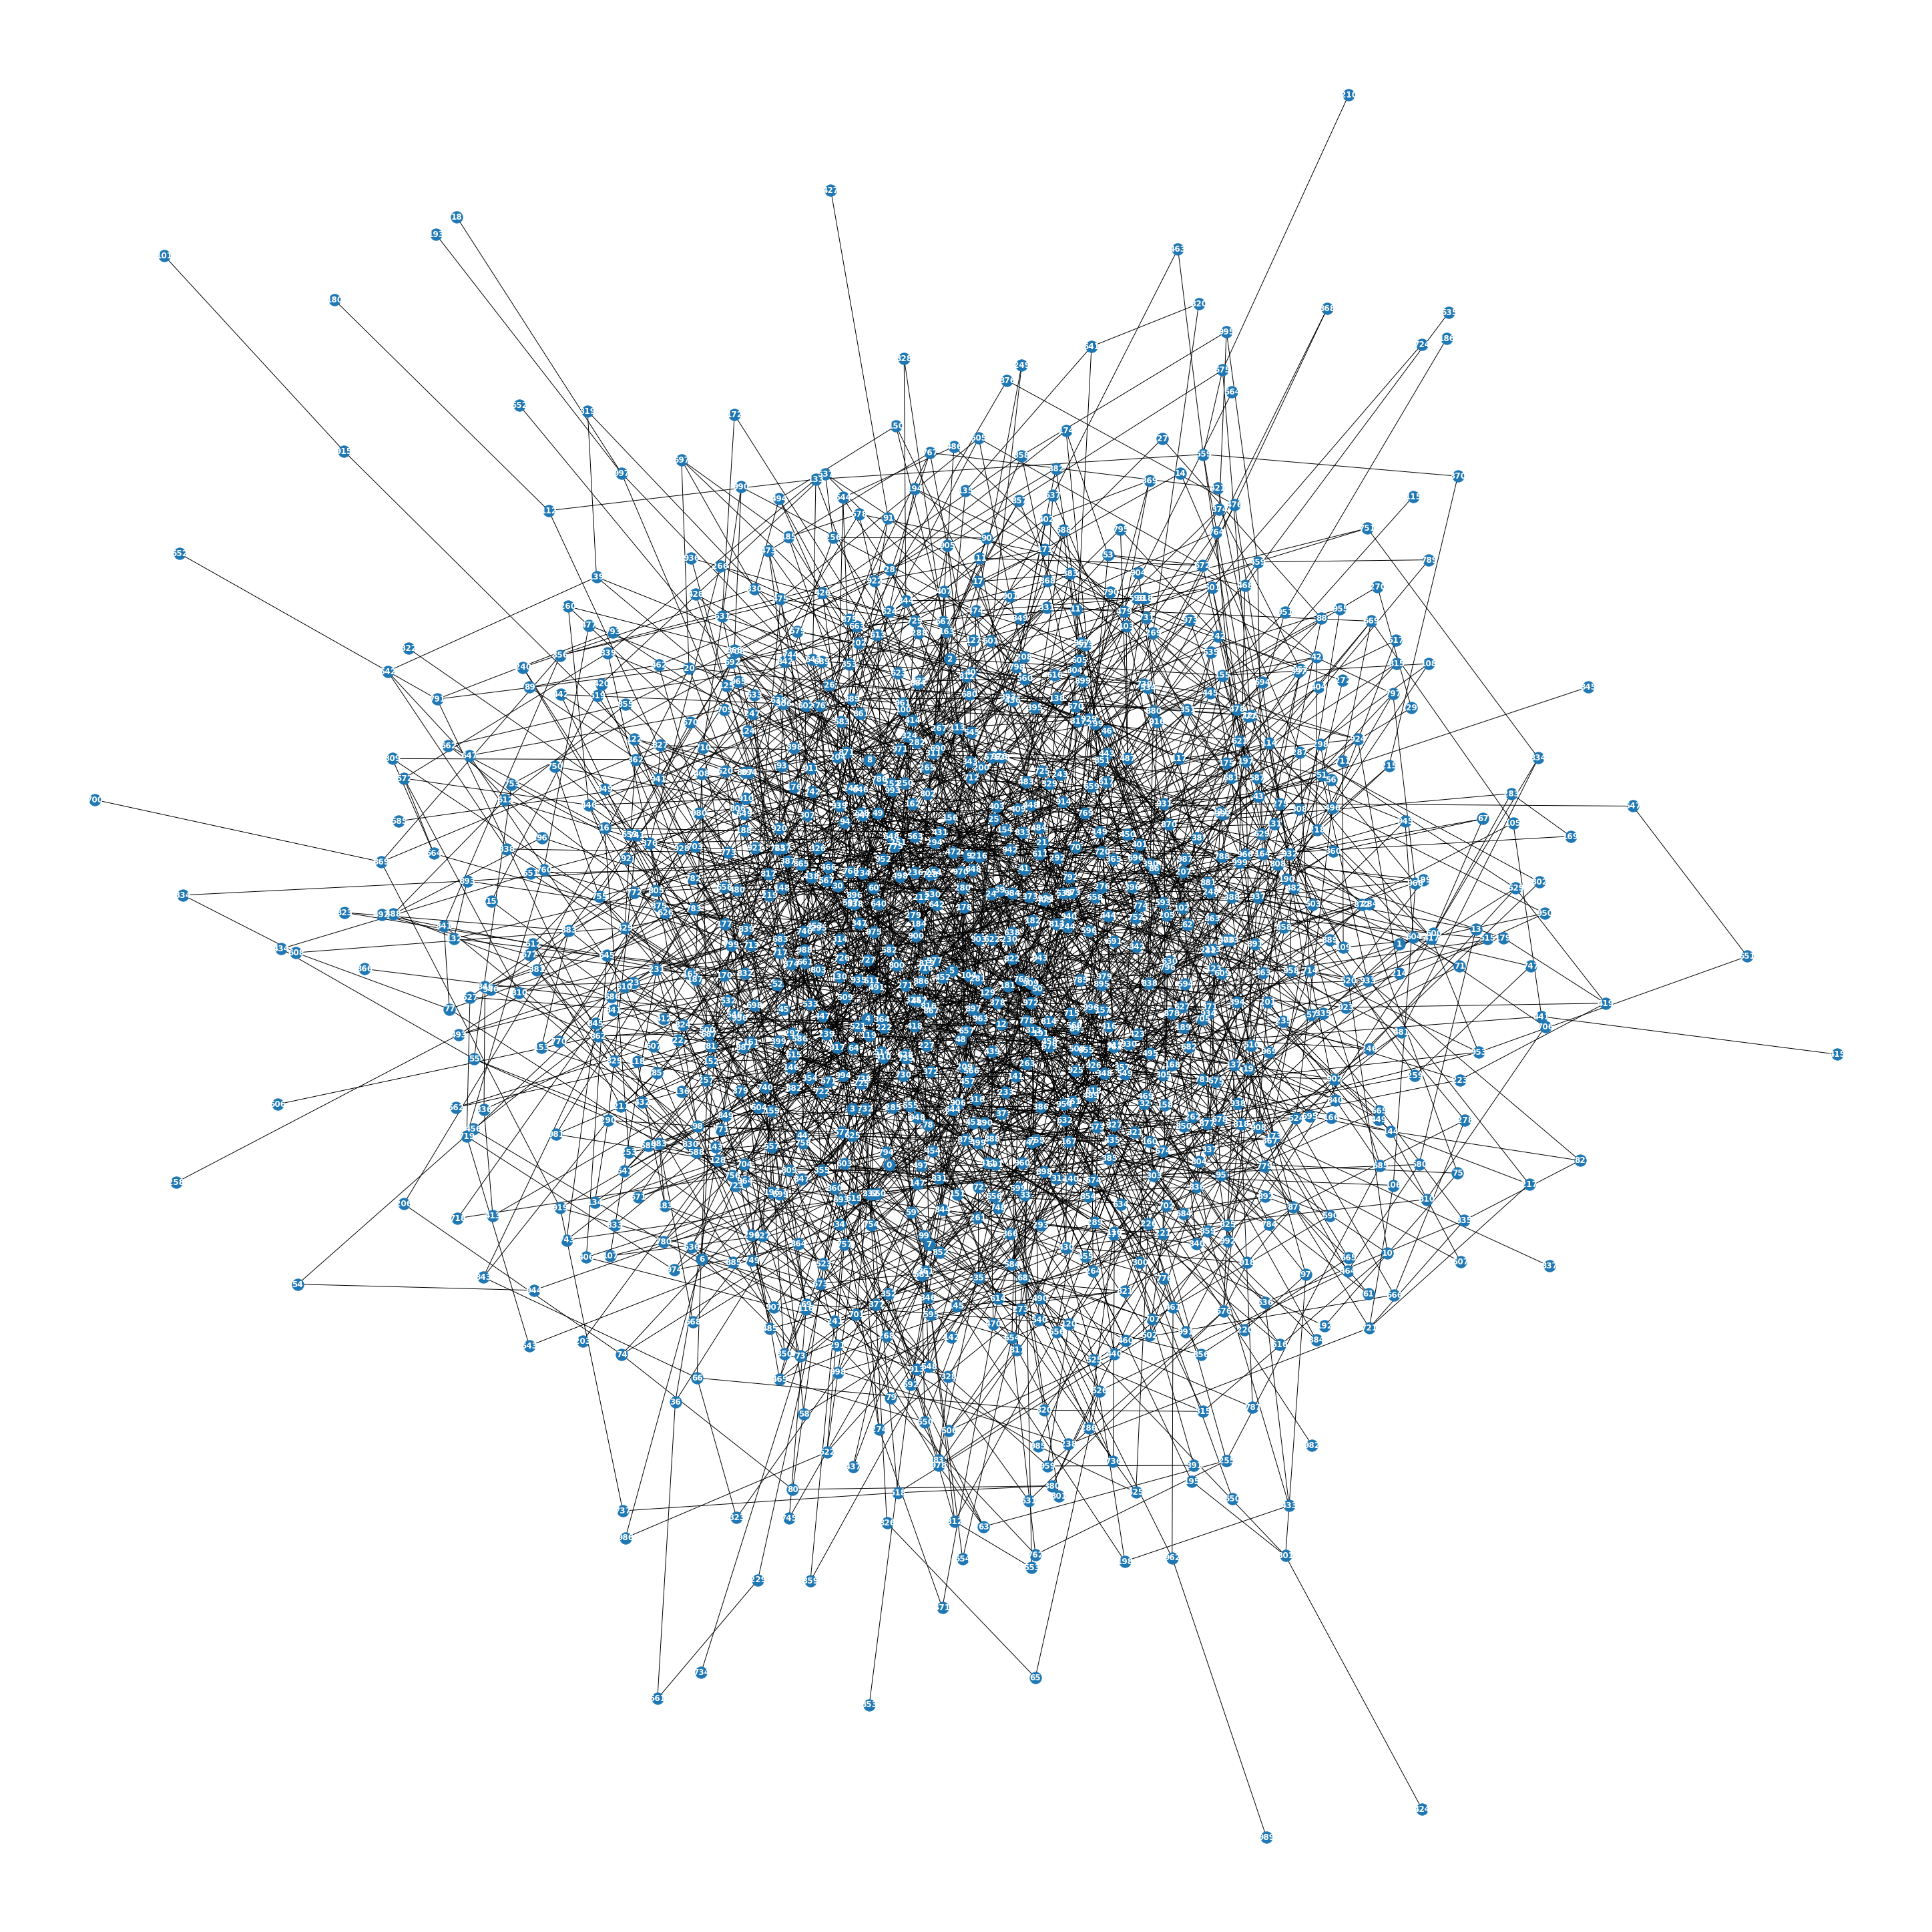

In [19]:
generator.draw_graph(figsize=(40,40))

Ermm... ok

In [20]:
G.edges()

EdgeView([(0, 4), (0, 120), (0, 311), (0, 350), (0, 748), (1, 696), (1, 877), (1, 937), (1, 950), (2, 113), (2, 155), (2, 306), (2, 387), (2, 480), (2, 501), (3, 237), (3, 295), (3, 366), (3, 465), (3, 611), (4, 168), (4, 170), (4, 431), (4, 775), (4, 824), (5, 21), (5, 96), (5, 596), (5, 628), (5, 702), (5, 812), (5, 836), (5, 888), (5, 952), (6, 146), (6, 377), (6, 658), (6, 831), (6, 986), (7, 140), (7, 212), (7, 323), (7, 525), (7, 533), (7, 588), (7, 707), (7, 804), (8, 104), (8, 339), (8, 378), (8, 452), (8, 513), (8, 568), (9, 248), (9, 454), (9, 639), (9, 977), (10, 158), (10, 315), (10, 520), (11, 86), (11, 663), (11, 720), (12, 205), (12, 227), (12, 230), (12, 443), (12, 525), (12, 617), (12, 682), (12, 862), (13, 86), (13, 580), (14, 287), (14, 729), (15, 159), (15, 420), (16, 188), (16, 253), (16, 324), (16, 398), (16, 662), (17, 171), (17, 383), (17, 640), (17, 725), (18, 997), (19, 71), (19, 120), (19, 173), (19, 337), (19, 450), (19, 696), (19, 825), (19, 909), (20, 381)

In [21]:
H = G.to_directed()
list(H.edges())

[(0, 4),
 (0, 120),
 (0, 311),
 (0, 350),
 (0, 748),
 (1, 696),
 (1, 877),
 (1, 937),
 (1, 950),
 (2, 113),
 (2, 155),
 (2, 306),
 (2, 387),
 (2, 480),
 (2, 501),
 (3, 237),
 (3, 295),
 (3, 366),
 (3, 465),
 (3, 611),
 (4, 0),
 (4, 168),
 (4, 170),
 (4, 431),
 (4, 775),
 (4, 824),
 (5, 21),
 (5, 96),
 (5, 596),
 (5, 628),
 (5, 702),
 (5, 812),
 (5, 836),
 (5, 888),
 (5, 952),
 (6, 146),
 (6, 377),
 (6, 658),
 (6, 831),
 (6, 986),
 (7, 140),
 (7, 212),
 (7, 323),
 (7, 525),
 (7, 533),
 (7, 588),
 (7, 707),
 (7, 804),
 (8, 104),
 (8, 339),
 (8, 378),
 (8, 452),
 (8, 513),
 (8, 568),
 (9, 248),
 (9, 454),
 (9, 639),
 (9, 977),
 (10, 158),
 (10, 315),
 (10, 520),
 (11, 86),
 (11, 663),
 (11, 720),
 (12, 205),
 (12, 227),
 (12, 230),
 (12, 443),
 (12, 525),
 (12, 617),
 (12, 682),
 (12, 862),
 (13, 86),
 (13, 580),
 (14, 287),
 (14, 729),
 (15, 159),
 (15, 420),
 (16, 188),
 (16, 253),
 (16, 324),
 (16, 398),
 (16, 662),
 (17, 171),
 (17, 383),
 (17, 640),
 (17, 725),
 (18, 997),
 (19, 71),

In [22]:
adj_list3 = defaultdict(list)
for edge in H.edges:
    adj_list3[edge[0]].append(edge[1])

In [23]:
adj_list3

defaultdict(list,
            {0: [4, 120, 311, 350, 748],
             1: [696, 877, 937, 950],
             2: [113, 155, 306, 387, 480, 501],
             3: [237, 295, 366, 465, 611],
             4: [0, 168, 170, 431, 775, 824],
             5: [21, 96, 596, 628, 702, 812, 836, 888, 952],
             6: [146, 377, 658, 831, 986],
             7: [140, 212, 323, 525, 533, 588, 707, 804],
             8: [104, 339, 378, 452, 513, 568],
             9: [248, 454, 639, 977],
             10: [158, 315, 520],
             11: [86, 663, 720],
             12: [205, 227, 230, 443, 525, 617, 682, 862],
             13: [86, 580],
             14: [287, 729],
             15: [159, 420],
             16: [188, 253, 324, 398, 662],
             17: [171, 383, 640, 725],
             18: [997],
             19: [71, 120, 173, 337, 450, 696, 825, 909],
             20: [381, 570, 649, 697],
             21: [5, 242, 243, 387, 591],
             22: [239, 387, 860, 975],
             23: [219

### Solution for problem (a) and (b)
- Design an algorithm for computing the distance from each node in G to its
nearest hospital. Output the distance and the shortest path for each node to a
file
- Design an algorithm to complete the task (a) but its time complexity should not
depend on the total number of hospitals h. You could skip (b) if your algorithm
in (a) already satisfies this complexity constraint.

In [24]:
# declare hospitals
randomHospitals=list(map(int,random.sample(range(0,1000),40)))

In [25]:
randomHospitals

[722,
 971,
 295,
 983,
 615,
 189,
 598,
 530,
 288,
 643,
 86,
 502,
 355,
 576,
 183,
 478,
 31,
 804,
 140,
 661,
 337,
 508,
 559,
 969,
 390,
 213,
 533,
 683,
 950,
 34,
 635,
 660,
 477,
 992,
 87,
 414,
 303,
 766,
 942,
 241]

In [26]:
# input adjacency list and the hospitals
Finder=NearestHospitalFinder(adj_list3,randomHospitals)

In [27]:
# .solve() method finds the shortest path 
Finder.solve()

In [28]:
# shortest paths are stored in .solutionPath instance variable
Finder.solutionPath

defaultdict(dict,
            {722: {722: [722]},
             971: {971: [971]},
             295: {295: [295]},
             983: {983: [983]},
             615: {615: [615]},
             189: {189: [189]},
             598: {598: [598]},
             530: {530: [530]},
             288: {288: [288]},
             643: {643: [643]},
             86: {86: [86]},
             502: {502: [502]},
             355: {355: [355]},
             576: {576: [576]},
             183: {183: [183]},
             478: {478: [478]},
             31: {31: [31]},
             804: {804: [804]},
             140: {140: [140]},
             661: {661: [661]},
             337: {337: [337]},
             508: {508: [508]},
             559: {559: [559]},
             969: {969: [969]},
             390: {390: [390]},
             213: {213: [213]},
             533: {533: [533]},
             683: {683: [683]},
             950: {950: [950]},
             34: {34: [34]},
             635: {635: [635]},

In [29]:
Finder.solutionDistance

defaultdict(dict,
            {722: {722: 0},
             971: {971: 0},
             295: {295: 0},
             983: {983: 0},
             615: {615: 0},
             189: {189: 0},
             598: {598: 0},
             530: {530: 0},
             288: {288: 0},
             643: {643: 0},
             86: {86: 0},
             502: {502: 0},
             355: {355: 0},
             576: {576: 0},
             183: {183: 0},
             478: {478: 0},
             31: {31: 0},
             804: {804: 0},
             140: {140: 0},
             661: {661: 0},
             337: {337: 0},
             508: {508: 0},
             559: {559: 0},
             969: {969: 0},
             390: {390: 0},
             213: {213: 0},
             533: {533: 0},
             683: {683: 0},
             950: {950: 0},
             34: {34: 0},
             635: {635: 0},
             660: {660: 0},
             477: {477: 0},
             992: {992: 0},
             87: {87: 0},
          

In [30]:
Finder.solutionPath[334]

{983: [334, 608, 77, 983]}

In [31]:
# check using the adjacency list
for s in Finder.solutionPath[334][983]:
    print(Finder.adj_list[s])

[608, 893]
[77, 334, 429]
[219, 341, 608, 983]
[77, 183, 227, 668, 816]


### Solution for problem (a) and (b)
- Design an algorithm for computing the distance from each node in G to its
nearest hospital. Output the distance and the shortest path for each node to a
file
- Design an algorithm to complete the task (a) but its time complexity should not
depend on the total number of hospitals h. You could skip (b) if your algorithm
in (a) already satisfies this complexity constraint.

In [32]:
# topK() method takes input K and finds distances to top k nearest hospitals
K=3
Finder.topK(K)

In [33]:
# top K distances are found in .topKDistances instance variable
Finder.topKDistances

defaultdict(dict,
            {722: {722: 0, 508: 1, 390: 2},
             98: {722: 1, 530: 2, 508: 2},
             251: {722: 1, 969: 2, 390: 1},
             508: {722: 1, 661: 3, 508: 0},
             196: {722: 2, 530: 1, 660: 2},
             231: {722: 2, 533: 2, 683: 2},
             376: {722: 2, 530: 3, 508: 3},
             888: {722: 2, 598: 3, 508: 2},
             907: {722: 2, 508: 3, 533: 2},
             306: {722: 2, 530: 2, 390: 2},
             390: {722: 2, 969: 1, 390: 0},
             409: {722: 2, 615: 2, 140: 2},
             452: {722: 2, 390: 2, 533: 2},
             514: {390: 2, 533: 2, 414: 1},
             842: {722: 2, 508: 3, 390: 2},
             207: {722: 2, 661: 2, 508: 1},
             495: {722: 2, 971: 2, 508: 1},
             498: {722: 2, 615: 3, 508: 1},
             684: {722: 2, 508: 1, 34: 2},
             796: {722: 2, 983: 3, 508: 1},
             74: {530: 2, 337: 3, 660: 1},
             386: {530: 2, 288: 2, 576: 2},
             530:

In [34]:
Finder.topKDistances[893]

{598: 3, 643: 3, 355: 2}

In [35]:
# check for nodes with more than K distances
[solutions for solutions in Finder.topKDistances.values() if len(solutions)>3]

[]

---
## Real Road Network in Pennsylvania (Large-scale Graph)

In [36]:
# read data (as a pandas Series consisting of edges)
with open("Pennsylvania road network.txt") as f: 
    data = f.readlines() 
    data = pd.Series(data[4:])
    data = data.apply(lambda x:x.replace('\n','').split('\t'))

In [37]:
data

0                      [0, 1]
1                   [0, 6309]
2                   [0, 6353]
3                      [1, 0]
4                   [6353, 0]
                  ...        
3083791    [1090892, 1090891]
3083792    [1090901, 1090894]
3083793    [1090902, 1090894]
3083794    [1090903, 1090894]
3083795    [1090900, 1090898]
Length: 3083796, dtype: object

In [38]:
# convert data to graph represented as adjacency list
adj_list=defaultdict(list)
for edge in data:
    adj_list[edge[0]].append(edge[1])

### Solution to problem (a) and (b)
- Design an algorithm for computing the distance from each node in G to its
nearest hospital. Output the distance and the shortest path for each node to a
file
- Design an algorithm to complete the task (a) but its time complexity should not
depend on the total number of hospitals h. You could skip (b) if your algorithm
in (a) already satisfies this complexity constraint.

<img src="number of hospitals in Pennsylvania.png" width="600" align="center"/>

Based on the information found in Google, it is justifiable for us to select 250 hospitals randomly for our algorithm. 

In [39]:
# declare hospitals
randomHospitals=list(map(str,random.sample(range(1,1090919),250)))

In [40]:
randomHospitals

['60590',
 '334869',
 '280512',
 '626832',
 '548180',
 '274919',
 '124906',
 '1028601',
 '392266',
 '906416',
 '38776',
 '690282',
 '827066',
 '145434',
 '531649',
 '822982',
 '512117',
 '975835',
 '673706',
 '424613',
 '52105',
 '884321',
 '704172',
 '1063911',
 '164005',
 '419036',
 '690783',
 '251471',
 '152432',
 '1047236',
 '1005864',
 '864827',
 '1075028',
 '84743',
 '312661',
 '111519',
 '264586',
 '149936',
 '117257',
 '491157',
 '506289',
 '298564',
 '691210',
 '1006817',
 '280461',
 '619918',
 '1061003',
 '117713',
 '1021618',
 '428068',
 '164464',
 '338589',
 '1011004',
 '596668',
 '350355',
 '1049172',
 '1031388',
 '662176',
 '23371',
 '254181',
 '811296',
 '1089733',
 '996762',
 '901019',
 '30501',
 '834996',
 '434510',
 '743335',
 '990246',
 '521811',
 '1082394',
 '834137',
 '91279',
 '571644',
 '186069',
 '740759',
 '966910',
 '385017',
 '801288',
 '539837',
 '164935',
 '699258',
 '410512',
 '154525',
 '653632',
 '23200',
 '142887',
 '823538',
 '780049',
 '653880',
 '328

In [41]:
# input adjacency list and the hospitals
Finder=NearestHospitalFinder(adj_list,randomHospitals)

In [42]:
# .solve() method finds the shortest path 
Finder.solve()

In [43]:
# shortest paths are stored in .solutionPath instance variable
Finder.solutionPath

defaultdict(dict,
            {'60590': {'60590': ['60590']},
             '334869': {'334869': ['334869']},
             '280512': {'280512': ['280512']},
             '626832': {'626832': ['626832']},
             '548180': {'548180': ['548180']},
             '274919': {'274919': ['274919']},
             '124906': {'124906': ['124906']},
             '1028601': {'1028601': ['1028601']},
             '392266': {'392266': ['392266']},
             '906416': {'906416': ['906416']},
             '38776': {'38776': ['38776']},
             '690282': {'690282': ['690282']},
             '827066': {'827066': ['827066']},
             '145434': {'145434': ['145434']},
             '531649': {'531649': ['531649']},
             '822982': {'822982': ['822982']},
             '512117': {'512117': ['512117']},
             '975835': {'975835': ['975835']},
             '673706': {'673706': ['673706']},
             '424613': {'424613': ['424613']},
             '52105': {'52105': ['52105']},
 

In [44]:
Finder.solutionPath['7598']

{'7532': ['7598',
  '6334',
  '6321',
  '6322',
  '7302',
  '6324',
  '7473',
  '6343',
  '6342',
  '7465',
  '7477',
  '7532']}

In [45]:
# check using the adjacency list
for s in Finder.solutionPath['7598']['7532']:
    print(Finder.adj_list[s])

['6334']
['6321', '6333', '7598']
['6322', '6334', '6335']
['6321', '7302', '7303', '7305']
['6322', '6324', '6336']
['3447', '6323', '7302', '7303', '7473']
['6324', '6343', '7474']
['6313', '6341', '6342', '7473']
['6341', '6343', '7465', '7475']
['6342', '7330', '7476', '7477']
['6339', '7465', '7479', '7532']
['7328', '7477']


In [46]:
Finder.solutionDistance

defaultdict(dict,
            {'60590': {'60590': 0},
             '334869': {'334869': 0},
             '280512': {'280512': 0},
             '626832': {'626832': 0},
             '548180': {'548180': 0},
             '274919': {'274919': 0},
             '124906': {'124906': 0},
             '1028601': {'1028601': 0},
             '392266': {'392266': 0},
             '906416': {'906416': 0},
             '38776': {'38776': 0},
             '690282': {'690282': 0},
             '827066': {'827066': 0},
             '145434': {'145434': 0},
             '531649': {'531649': 0},
             '822982': {'822982': 0},
             '512117': {'512117': 0},
             '975835': {'975835': 0},
             '673706': {'673706': 0},
             '424613': {'424613': 0},
             '52105': {'52105': 0},
             '884321': {'884321': 0},
             '704172': {'704172': 0},
             '1063911': {'1063911': 0},
             '164005': {'164005': 0},
             '419036': {'419036': 

### Solution to problem (c) and (d)
- In some circumstances (e.g., big disasters, fires, etc.), having the distance from
each node to the nearest hospital is not good enough. Instead, we are
interested in finding the distances to top-2 nearest hospitals from each node.
Revise your algorithm in (b) to accommodate this new requirement. If revision
is not possible, you are free to design a new algorithm.
- Propose an algorithm that works generally for computing the distances from
each node to top-k nearest hospitals for an input value of k.

In [47]:
# topK() method takes input K and finds distances to top k nearest hospitals
K=2
Finder.topK(K)

In [48]:
# top K distances are found in .topKDistances instance variable
Finder.topKDistances

defaultdict(dict,
            {'60590': {'60590': 0, '232827': 68},
             '60390': {'60590': 1, '232827': 67},
             '60589': {'60590': 1, '39228': 67},
             '64969': {'60590': 1, '232827': 69},
             '60350': {'60590': 2, '232827': 68},
             '60592': {'60590': 2, '232827': 66},
             '60611': {'60590': 2, '39228': 66},
             '64970': {'60590': 2, '39228': 68},
             '65020': {'60590': 2, '39228': 67},
             '60351': {'60590': 3, '232827': 69},
             '60352': {'60590': 3, '232827': 69},
             '60591': {'60590': 3, '232827': 67},
             '60594': {'60590': 3, '232827': 66},
             '64956': {'60590': 3, '232827': 65},
             '60610': {'60590': 3, '39228': 65},
             '60631': {'60590': 3, '39228': 65},
             '64971': {'60590': 3, '39228': 69},
             '65021': {'60590': 3, '39228': 68},
             '65036': {'60590': 3, '39228': 66},
             '60208': {'60590': 4, '23282

In [49]:
Finder.topKDistances['3765']

{'3956': 13, '7532': 18}

---
## Output to file

We will output the file based on the real road netowrk in Pennsylvania

In [50]:
sys.stdout = open("Solution Path.txt", "w")
print(Finder.solutionPath)

In [51]:
sys.stdout = open("Solution Distance.txt", "w")
print(Finder.solutionDistance)

In [52]:
sys.stdout = open("Top 2 distance.txt", "w")
print(Finder.topKDistances)

---
## Empirical Analysis

We will conduct the following empirical analysis based on the read road network of Pennsylvania:

> 1. Effect of h on the .solve() algorithm
> 2. Effect of k on the .topK() algorithm
> 3. Effect of both h and k on the .topK() algorithm

variable = h and k
record the time elapsed
plot a graph
number of nodes

### For the first algo - solve
- parameter = number of hospitals (h)

In [53]:
number_of_hospitals = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bar = progressbar.ProgressBar(max_value=progressbar.UnknownLength)
runtime1 = []

for i in number_of_hospitals:
    
    randomHospitals=list(map(str,random.sample(range(1,1090919),i))) # could cause inaccuracies here
    Finder=NearestHospitalFinder(adj_list,randomHospitals)
    
    start = datetime.now()
    Finder.solve()
    bar.update(i)
    end = datetime.now()

    timetaken = end - start
    runtime1.append(timetaken.total_seconds())

data_h = pd.DataFrame(runtime1, columns=['time elapsed (seconds)'])

- |                                   #            | 1000 Elapsed Time: 0:01:29

In [54]:
data_h.insert(0, "number of hospitals", [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], True) 

In [55]:
data_h

number of hospitals  time elapsed (seconds)
0                  100               10.438270
1                  200                9.276233
2                  300                9.881493
3                  400                9.503964
4                  500                9.182226
5                  600               10.295055
6                  700                9.656386
7                  800                8.884372
8                  900                9.535182
9                 1000                9.375122

(0, 10.515964899999998)

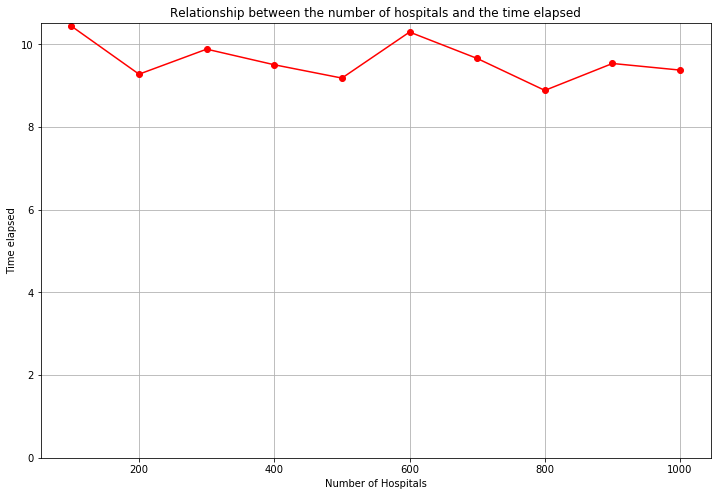

In [56]:
plt.figure(figsize=(12,8))
plt.title('Relationship between the number of hospitals and the time elapsed')
plt.grid()
line = plt.plot(data_h['number of hospitals'], data_h['time elapsed (seconds)'], label='BFS', marker='o', color='red')
plt.xlabel('Number of Hospitals')
plt.ylabel('Time elapsed')
plt.ylim(ymin=0)

In [57]:
number_of_hospitals = [1, 10, 50, 100, 500, 1000, 5000, 10000]
bar = progressbar.ProgressBar(max_value=progressbar.UnknownLength)
runtime1 = []

for i in number_of_hospitals:
    
    randomHospitals=list(map(str,random.sample(range(1,1090919),i))) # could cause inaccuracies here
    Finder=NearestHospitalFinder(adj_list,randomHospitals)
    
    start = datetime.now()
    Finder.solve()
    bar.update(i)
    end = datetime.now()

    timetaken = end - start
    runtime1.append(timetaken.total_seconds())

data_h = pd.DataFrame(runtime1, columns=['time elapsed (seconds)'])

| |                          #                    | 10000 Elapsed Time: 0:01:12

In [58]:
data_h.insert(0, "number of hospitals", [1, 10, 50, 100, 500, 1000, 5000, 10000], True) 

In [59]:
data_h

number of hospitals  time elapsed (seconds)
0                    1               13.177167
1                   10               12.431195
2                   50                9.932098
3                  100                9.175183
4                  500                9.125928
5                 1000                9.560966
6                 5000                9.080527
7                10000                8.810948

(0, 13.39547795)

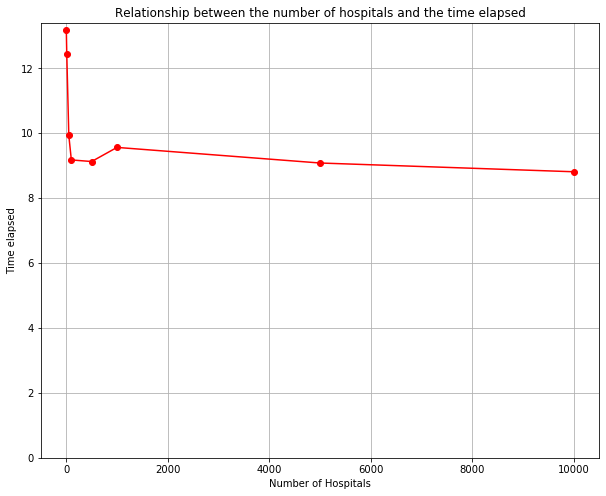

In [60]:
plt.figure(figsize=(10, 8))
plt.title('Relationship between the number of hospitals and the time elapsed')
plt.grid()
line = plt.plot(data_h['number of hospitals'], data_h['time elapsed (seconds)'], label='BFS', marker='o', color='red')
plt.xlabel('Number of Hospitals')
plt.ylabel('Time elapsed')
plt.ylim(ymin=0)

### For the second algo - Top K
- control parameter top-k nearest hospital from each node

In [61]:
# declare hospitals
randomHospitals=list(map(str,random.sample(range(1,1090919),250)))

In [62]:
randomHospitals

['364145',
 '290373',
 '871719',
 '836810',
 '144922',
 '1033008',
 '526329',
 '463140',
 '786061',
 '407222',
 '701226',
 '192771',
 '158451',
 '1052410',
 '844267',
 '1060132',
 '507441',
 '1068316',
 '960955',
 '981294',
 '127397',
 '340663',
 '578273',
 '716705',
 '1049820',
 '1083753',
 '789980',
 '1088145',
 '451805',
 '35701',
 '405788',
 '1063385',
 '100168',
 '399579',
 '328431',
 '559493',
 '1016590',
 '72911',
 '1075544',
 '243545',
 '925448',
 '333253',
 '752912',
 '811070',
 '523626',
 '475807',
 '292903',
 '265192',
 '693106',
 '517166',
 '321131',
 '837604',
 '339993',
 '33193',
 '457181',
 '1035949',
 '100320',
 '1024898',
 '932696',
 '134430',
 '34987',
 '81479',
 '313276',
 '1073903',
 '794494',
 '256618',
 '288649',
 '1006962',
 '433946',
 '415284',
 '927414',
 '550097',
 '734856',
 '193161',
 '1070630',
 '454141',
 '653392',
 '206197',
 '877577',
 '203752',
 '786004',
 '666096',
 '195605',
 '334235',
 '696792',
 '281843',
 '620484',
 '791919',
 '105487',
 '123976',


In [63]:
# input adjacency list and the hospitals
Finder=NearestHospitalFinder(adj_list,randomHospitals)

In [65]:
k_values = [1, 2, 3, 4, 5, 6, 7]
bar = progressbar.ProgressBar(max_value=progressbar.UnknownLength)
runtime2 = []

for i in k_values:
    
    start = datetime.now()
    Finder.topK(i) # the algorithm
    bar.update(i)
    end = datetime.now()

    timetaken = end - start
    runtime2.append(timetaken.total_seconds())

data_k = pd.DataFrame(runtime2, columns=['time elapsed (seconds)'])

\ |                          #                        | 7 Elapsed Time: 0:08:47

In [66]:
data_k

time elapsed (seconds)
0               40.516993
1               12.597780
2               66.745062
3               81.864634
4              102.318465
5              118.932924
6              145.327438

In [67]:
import numpy as np
data_k.index = np.arange(1,len(data_k)+1)

In [68]:
data_k

time elapsed (seconds)
1               40.516993
2               12.597780
3               66.745062
4               81.864634
5              102.318465
6              118.932924
7              145.327438

(0, 151.9639209)

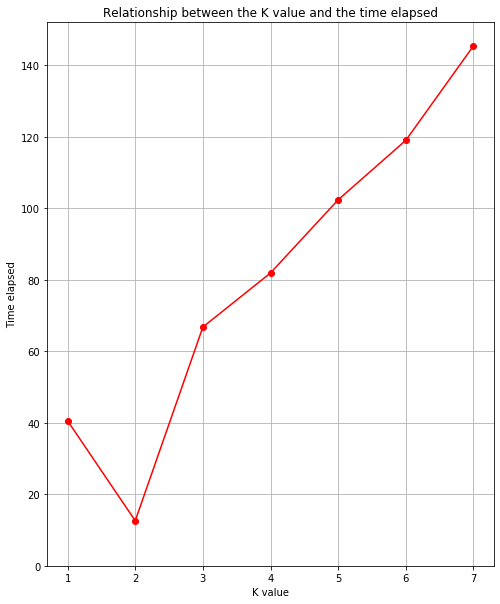

In [69]:
plt.figure(figsize=(8,10))
plt.title('Relationship between the K value and the time elapsed')
plt.grid()
line = plt.plot(data_k, label='BFS', marker='o', color='red')
plt.xlabel('K value')
plt.ylabel('Time elapsed')
plt.ylim(ymin=0)


In terms of practicability, do you really need to know the top-20 or even top-100 hospitals near you?

### For the second Algo, is there a relationship between h and k?

We are interested to know...

simpl 3x3 comparison bah...
number_of_hospitals = [50, 250, 1250]

In [70]:
k_values = [2, 3, 4]
runtime3 = []
runtime4 = []
runtime5 = []

In [71]:
randomHospitals=list(map(str,random.sample(range(1,1090919),50)))
Finder=NearestHospitalFinder(adj_list,randomHospitals)
    
for i in k_values:

    start = datetime.now()
    Finder.topK(i) # the algorithm
    bar.update(i)
    end = datetime.now()

    timetaken = end - start
    runtime3.append(timetaken.total_seconds())

data_mix = pd.DataFrame(runtime3, columns=['timetaken(seconds, h=50)'])

- |                   #                               | 4 Elapsed Time: 0:12:02

In [72]:
randomHospitals=list(map(str,random.sample(range(1,1090919),250)))
Finder=NearestHospitalFinder(adj_list,randomHospitals)
    
for i in k_values:

    start = datetime.now()
    Finder.topK(i) # the algorithm
    bar.update(i)
    end = datetime.now()

    timetaken = end - start
    runtime4.append(timetaken.total_seconds())

data_mix.insert(1, 'timetaken(seconds, h=250)', runtime4)

/ |      #                                            | 4 Elapsed Time: 0:15:58

In [73]:
randomHospitals=list(map(str,random.sample(range(1,1090919),1250)))
Finder=NearestHospitalFinder(adj_list,randomHospitals)
    
for i in k_values:

    start = datetime.now()
    Finder.topK(i) # the algorithm
    bar.update(i)
    end = datetime.now()

    timetaken = end - start
    runtime5.append(timetaken.total_seconds())

data_mix.insert(2, 'timetaken(seconds, h=1250)', runtime5)

| |                             #                     | 4 Elapsed Time: 0:21:01

In [74]:
data_mix

timetaken(seconds, h=50)  timetaken(seconds, h=250)  \
0                 66.824084                  83.371474   
1                 58.342160                  69.258589   
2                 69.098429                  83.041214   

   timetaken(seconds, h=1250)  
0                  107.340773  
1                   90.634039  
2                  105.504102

In [75]:
data_mix.index = np.arange(2, len(data_mix)+2)

In [76]:
data_mix

timetaken(seconds, h=50)  timetaken(seconds, h=250)  \
2                 66.824084                  83.371474   
3                 58.342160                  69.258589   
4                 69.098429                  83.041214   

   timetaken(seconds, h=1250)  
2                  107.340773  
3                   90.634039  
4                  105.504102

(0, 109.79070365)

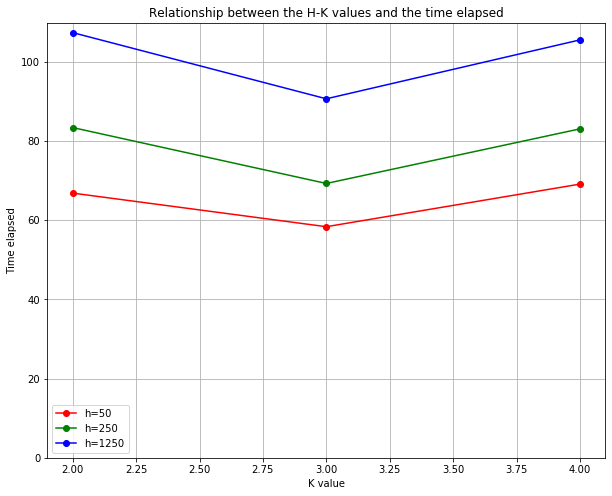

In [152]:
plt.figure(figsize=(10,8))
plt.title('Relationship between the H & K values and the time elapsed')
plt.grid()
plt.plot(data_mix['timetaken(seconds, h=50)'], marker='o', color='red')
plt.plot(data_mix['timetaken(seconds, h=250)'], marker='o', color='green')
plt.plot(data_mix['timetaken(seconds, h=1250)'], marker='o', color='blue')
plt.xlabel('K value')
plt.ylabel('Time elapsed')
plt.gca().legend(['h=50','h=250','h=1250'])
plt.ylim(ymin=0)

proportional

---
# Conclusion

Factors:
1. Scale of the road map
2. the Algorithm itself - could be further improved of course
3. number of hospital
4. top -k
5. Concern of randomization - looks general but involves luck

> 1. First algo (BFS modified) - quite efficient
> 2. Second algo (Top k) - brute force 

For tutor to check
step